In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/workspace code/python/Projects/us accidents/us-accidents/US_Accidents_March23.csv")

### general information

In [3]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [4]:
df.isnull().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

In [5]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [6]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
df['Timezone'].unique()

array(['US/Eastern', 'US/Pacific', nan, 'US/Central', 'US/Mountain'],
      dtype=object)

In [9]:
df['Zipcode'].value_counts()

Zipcode
91761         11247
91706         10022
92407          8922
92507          8850
33186          8375
              ...  
29349-9729        1
27263-8819        1
28208-2854        1
24416-1269        1
94401-2213        1
Name: count, Length: 825094, dtype: int64

In [10]:
df['Weather_Timestamp']

0          2016-02-08 05:58:00
1          2016-02-08 05:51:00
2          2016-02-08 06:56:00
3          2016-02-08 07:38:00
4          2016-02-08 07:53:00
                  ...         
7728389    2019-08-23 17:53:00
7728390    2019-08-23 18:53:00
7728391    2019-08-23 18:53:00
7728392    2019-08-23 18:51:00
7728393    2019-08-23 20:50:00
Name: Weather_Timestamp, Length: 7728394, dtype: object

In [11]:
df['County'].unique()

array(['Montgomery', 'Franklin', 'Clermont', ..., 'Woods', 'Mellette',
       'Ness'], dtype=object)

In [12]:
df['Severity'].unique()

array([3, 2, 1, 4], dtype=int64)

In [13]:
df['Weather_Timestamp']

0          2016-02-08 05:58:00
1          2016-02-08 05:51:00
2          2016-02-08 06:56:00
3          2016-02-08 07:38:00
4          2016-02-08 07:53:00
                  ...         
7728389    2019-08-23 17:53:00
7728390    2019-08-23 18:53:00
7728391    2019-08-23 18:53:00
7728392    2019-08-23 18:51:00
7728393    2019-08-23 20:50:00
Name: Weather_Timestamp, Length: 7728394, dtype: object

In [14]:
df['Timezone'].value_counts()

Timezone
US/Eastern     3580167
US/Pacific     2062984
US/Central     1645616
US/Mountain     431819
Name: count, dtype: int64

### handling data types 


In [15]:
df['Start_Time'] = df['Start_Time'].str.replace(r'\.\d+', '', regex=True)
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

#format of the stat tie is like yyyy-mm-dd hh:mm:sss

In [16]:
df['End_Time'] = df['End_Time'].str.replace(r'\.\d+', '', regex=True)
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [17]:
df['Zipcode'] = df['Zipcode'].str.slice(0,5)
df['Zipcode'] = df['Zipcode'].fillna(0).astype(int)

#format zzzzz

In [18]:
df['Weather_Timestamp'] = df['Weather_Timestamp'].str.replace(r'\.\d+', '', regex=True)
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])

#### Handling missing End_Lat and End_Lag
Now we can replace the values with the start lat and start lag since we can assume and most cases are point accidents. 

In [19]:
df['End_Lat'].fillna(df['Start_Lat'], inplace=True)
df['End_Lng'].fillna(df['Start_Lng'], inplace=True)

In [20]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,39.865147,-84.058723,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,39.928059,-82.831184,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,39.063148,-84.032608,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,39.747753,-84.205582,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,39.627781,-84.188354,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


### Handling the weather condition column


In [21]:
df['weather_Condition'] = df['Weather_Condition'].str.split().str[-1]

In [22]:
df['weather_Condition'].value_counts()

weather_Condition
Fair             2560802
Cloudy           2532249
Clear             808743
Rain              482903
Overcast          382866
Clouds            204829
Snow              150003
Fog               107888
Windy             107430
Haze               76233
Drizzle            29137
Thunder            27872
T-Storm            26481
Vicinity           19125
Smoke              12669
Mix                11732
Thunderstorm        4441
Mist                3539
Precipitation       3252
Sleet                992
Dust                 370
Pellets              367
Shower               365
Showers              313
Hail                 138
Whirlwinds            51
Squalls               35
Cloud                 22
Ash                   22
Sand                  21
Tornado               19
Grains                15
Nearby                 7
Duststorm              3
Whirls                 1
Name: count, dtype: int64

In [23]:
# Replace 'Clouds' with 'Cloudy' in the 'new_column'
df['weather_Condition'] = df['weather_Condition'].replace('Clouds', 'Cloudy')

In [24]:
# List of desired features
features = ['Fair', 'Cloudy', 'Clear', 'Rain', 'Overcast', 'Snow', 'Fog', 'Windy', 'Haze']

# Keep only the rows where 'new_column' is in the list of features
df = df[df['weather_Condition'].isin(features)]


### dropping columns

In [25]:
df.drop('ID', axis=1, inplace=True)#1(no of features dropped)

In [26]:
#since country is USA
df.drop('Country', axis=1, inplace=True)#2

In [27]:
df.drop(['Astronomical_Twilight','Sunrise_Sunset','Civil_Twilight','Nautical_Twilight'], axis=1, inplace=True)#6

In [28]:
df.drop(['End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Description', 'Weather_Timestamp', 'Distance(mi)'],axis=1, inplace=True)#14

In [29]:
df.drop('Weather_Condition', axis=1, inplace=True)

In [30]:
df.drop(['Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)'], axis=1, inplace=True)

### Genral information updated


In [31]:
import seaborn as sns

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7413946 entries, 0 to 7728393
Data columns (total 25 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Source             object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   Street             object        
 4   City               object        
 5   County             object        
 6   State              object        
 7   Zipcode            int32         
 8   Timezone           object        
 9   Airport_Code       object        
 10  Temperature(F)     float64       
 11  Amenity            bool          
 12  Bump               bool          
 13  Crossing           bool          
 14  Give_Way           bool          
 15  Junction           bool          
 16  No_Exit            bool          
 17  Railway            bool          
 18  Roundabout         bool          
 19  Station            bool          
 20  Stop               bool      

In [33]:
df.isnull().sum().sort_values(ascending=False)

Temperature(F)       26248
Street               10307
City                   236
Source                   0
Give_Way                 0
Turning_Loop             0
Traffic_Signal           0
Traffic_Calming          0
Stop                     0
Station                  0
Roundabout               0
Railway                  0
No_Exit                  0
Junction                 0
Bump                     0
Crossing                 0
Severity                 0
Amenity                  0
Airport_Code             0
Timezone                 0
Zipcode                  0
State                    0
County                   0
Start_Time               0
weather_Condition        0
dtype: int64

In [34]:
df.columns

Index(['Source', 'Severity', 'Start_Time', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Timezone', 'Airport_Code', 'Temperature(F)', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'weather_Condition'],
      dtype='object')

In [35]:
len(df.columns)

25

In [36]:
df['Severity'].value_counts()

Severity
2    5909419
3    1245737
4     193521
1      65269
Name: count, dtype: int64

In [37]:
df['Temperature(F)'].value_counts()

Temperature(F)
 73.0     165545
 77.0     164919
 68.0     160191
 72.0     156263
 75.0     152906
           ...  
 1.6           1
-24.5          1
-24.9          1
 158.0         1
 113.9         1
Name: count, Length: 858, dtype: int64

In [38]:
df.shape

(7413946, 25)

In [39]:
df.isnull().sum()

Source                   0
Severity                 0
Start_Time               0
Street               10307
City                   236
County                   0
State                    0
Zipcode                  0
Timezone                 0
Airport_Code             0
Temperature(F)       26248
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
weather_Condition        0
dtype: int64

#### dropping the null rows in the columns

In [40]:
df = df.dropna(subset=['Temperature(F)'])

In [41]:
df = df.dropna(subset=['Street'])

In [42]:
df = df.dropna(subset=['City'])

In [43]:
df.isnull().sum()

Source               0
Severity             0
Start_Time           0
Street               0
City                 0
County               0
State                0
Zipcode              0
Timezone             0
Airport_Code         0
Temperature(F)       0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
weather_Condition    0
dtype: int64

In [44]:
df['Timezone'].value_counts()

Timezone
US/Eastern     3400373
US/Pacific     1988580
US/Central     1581628
US/Mountain     406638
Name: count, dtype: int64

#### Handling the Timezone feature and modifying the start_time column according to it


In [45]:
df['Start_Time'] = df['Start_Time'].dt.tz_localize('UTC')

In [46]:
df['Start_Time'] = df['Start_Time'].dt.tz_convert('US/Central').dt.tz_localize(None)

In [47]:
df.drop('Timezone', axis=1, inplace=True)

#### Creating new column , for the day_category


In [48]:
def day_category(time):
    if 6 <= time.hour <= 18:
        return 'Day'
    elif 18 <= time.hour < 22:
        return 'Evening'
    else:
        return 'Night'

In [49]:
df['day_category'] = df['Start_Time'].apply(day_category)

In [50]:
df['Day_type'] = df['day_category']
df.drop('day_category', axis=1, inplace=True)

# Analysis


In [51]:
df.columns


Index(['Source', 'Severity', 'Start_Time', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Airport_Code', 'Temperature(F)', 'Amenity', 'Bump',
       'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout',
       'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'weather_Condition', 'Day_type'],
      dtype='object')

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Numerical Analysis

In [53]:
df['weather_Condition'].value_counts()

weather_Condition
Cloudy      2725016
Fair        2545304
Clear        805926
Rain         480382
Overcast     381777
Snow         149418
Fog          107063
Windy        106787
Haze          75546
Name: count, dtype: int64

In [54]:
df['County'].value_counts()

County
Los Angeles          505691
Miami-Dade           238176
Orange               232095
Harris               175779
Dallas               152205
                      ...  
Oregon                    1
Poquoson (City)           1
Cottle                    1
Newport News City         1
Ness                      1
Name: count, Length: 1856, dtype: int64

In [55]:
df['Street'].value_counts()

Street
I-95 N                  73099
I-5 N                   70068
I-95 S                  69205
I-10 E                  53585
I-10 W                  51771
                        ...  
Wise Women Rd               1
30W627 Army Trail Rd        1
Red Rock Blvd               1
Ranchland Dr                1
473-401 Cutoff Rd           1
Name: count, Length: 328105, dtype: int64

In [56]:
df['Street'].value_counts()

Street
I-95 N                  73099
I-5 N                   70068
I-95 S                  69205
I-10 E                  53585
I-10 W                  51771
                        ...  
Wise Women Rd               1
30W627 Army Trail Rd        1
Red Rock Blvd               1
Ranchland Dr                1
473-401 Cutoff Rd           1
Name: count, Length: 328105, dtype: int64

In [57]:
df[df['Street'] == df['Street'].value_counts().index[2]]['City'].mode()[0]


'Miami'

In [58]:
df[df['Street'] == 'I-70 W']['City'].mode()[0]


'Kansas City'

In [59]:
df['Source'].value_counts()


Source
Source1    4105750
Source2    3177675
Source3      93794
Name: count, dtype: int64

#### Severity

In [60]:
df['Severity'].value_counts()

Severity
2    5879768
3    1240421
4     192200
1      64830
Name: count, dtype: int64

In [61]:
df['City'].value_counts()

City
Miami                           176538
Houston                         164592
Los Angeles                     154719
Charlotte                       136365
Dallas                          126834
                                 ...  
Manitowish Waters                    1
Adolphus                             1
Abiquiu                              1
Glenn Heights                        1
American Fork-Pleasant Grove         1
Name: count, Length: 13183, dtype: int64

In [62]:
df['State'].value_counts()

State
CA    1675779
FL     832529
TX     561486
SC     366913
NY     337713
NC     327335
PA     285396
VA     277903
MN     184202
OR     172436
IL     165049
TN     162658
AZ     162109
GA     161430
MI     159410
LA     143473
NJ     132617
OH     114994
MD     110168
WA     105701
AL      96199
CO      87374
UT      87264
OK      80919
MO      73954
CT      69438
IN      64839
MA      58516
WI      33543
KY      31332
NE      27979
MT      26965
IA      24946
AR      21157
NV      20812
KS      17755
DC      17152
RI      16155
MS      14376
DE      13838
WV      13184
ID      10247
NM      10038
NH       9834
WY       3270
ND       3071
ME       2610
VT        873
SD        278
Name: count, dtype: int64

In [63]:
len(df['City'].unique())

13183

## Severity


In [64]:
# Severity and City
severe_acc = df[df['Severity']==4] #create filer
city_count = severe_acc['City'].value_counts() #applying filter
city_count.head(10)

City
Atlanta         2759
Miami           2104
Dallas          1155
Orlando         1074
Houston         1073
Columbus        1007
Jacksonville     973
Chicago          972
Washington       945
Los Angeles      928
Name: count, dtype: int64

In [65]:
# Severity and State
state_count = severe_acc['State'].value_counts()
state_count.head(10)

State
VA    16552
PA    15136
FL    12452
CA    12436
GA    12072
NY    10456
NC     9709
MD     8980
MI     7457
CO     6998
Name: count, dtype: int64

In [66]:
# Severity and County
county_count = severe_acc['County'].value_counts()
county_count.head(10)

County
Los Angeles    3617
Montgomery     2786
Orange         2523
Miami-Dade     2502
Fulton         2393
Maricopa       2353
Jefferson      2223
Washington     2093
Cook           1887
Franklin       1647
Name: count, dtype: int64

In [67]:
# Severity and Street
street_count = severe_acc['Street'].value_counts()
street_count.head(5)

Street
I-95 S    2099
I-95 N    1873
I-70 E    1290
I-70 W    1080
I-80 W    1046
Name: count, dtype: int64

In [68]:
# Severity and day_Category
df['Day_type'].value_counts()

Day_type
Day        4384714
Night      2719323
Evening     273182
Name: count, dtype: int64

In [69]:
# Severity and weather condition
weather_count = severe_acc['weather_Condition'].value_counts()
weather_count.head()

weather_Condition
Cloudy      67610
Fair        59286
Clear       26364
Overcast    13795
Rain        12510
Name: count, dtype: int64

In [70]:
# Severity and weather condition
temp_count = severe_acc['Temperature(F)'].value_counts()
temp_count.head()

Temperature(F)
73.0    3981
72.0    3871
68.0    3833
77.0    3760
75.0    3683
Name: count, dtype: int64

### Visualization - Severity

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Los Angeles'),
  Text(1, 0, 'Miami'),
  Text(2, 0, 'Orlando'),
  Text(3, 0, 'Dallas'),
  Text(4, 0, 'Charlotte'),
  Text(5, 0, 'Austin'),
  Text(6, 0, 'Houston'),
  Text(7, 0, 'Baton Rouge'),
  Text(8, 0, 'Nashville'),
  Text(9, 0, 'Raleigh')])

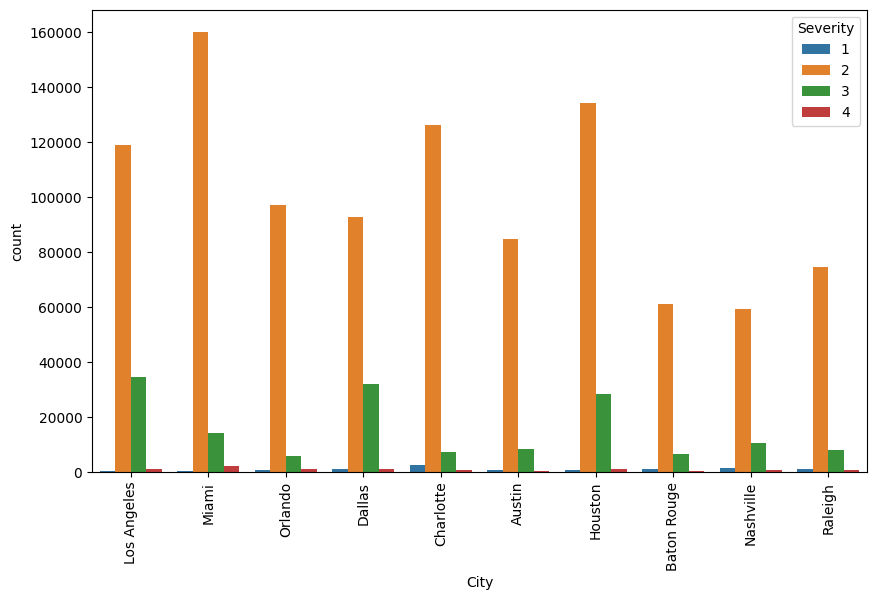

In [76]:
top_cities = df['City'].value_counts().index[:10]
plt.figure(figsize=(10, 6))  # Adjust the size as needed
sns.countplot(x='City', hue='Severity', data=df[df['City'].isin(top_cities)])
plt.xticks(rotation=90)



In [77]:
import geopandas as gpd

#### Real world data comparison


1. ### Insights from State and City Data
1. CA(California) have most accidents.(approx 1.75 Million)
- Reason : CA has highest population
2. SD(South Dakota) have Lowest number of accidents(approx 300)
- Reason : very low population (46th most populated of 50 states)
3. 1023 Cities having lowest/only 1 accident reported 
- Reason : Since most of the US cities have very less population
4. Miami has most number of accidents 
- 